# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid=2937f7b4647d8e03bd6a82778fecd048&units={units}&q="
cities_api = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
i = 1
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        cities_api.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f'Processing city number: {i} city name: {city}')
    except:
        print(f'{city} not found')
        pass
    i += 1

Processing city number: 1 city name: davila
Processing city number: 2 city name: oil city
Processing city number: 3 city name: mosquera
Processing city number: 4 city name: dikson
Processing city number: 5 city name: new norfolk
Processing city number: 6 city name: hasaki
Processing city number: 7 city name: ushuaia
Processing city number: 8 city name: puerto ayora
mys shmidta not found
taolanaro not found
Processing city number: 11 city name: cherskiy
Processing city number: 12 city name: kapaa
Processing city number: 13 city name: mataura
Processing city number: 14 city name: ola
Processing city number: 15 city name: lebu
Processing city number: 16 city name: tuktoyaktuk
Processing city number: 17 city name: taoudenni
belushya guba not found
bacuit not found
Processing city number: 20 city name: praia da vitoria
Processing city number: 21 city name: nikolskoye
Processing city number: 22 city name: barrow
Processing city number: 23 city name: bredasdorp
Processing city number: 24 city

Processing city number: 180 city name: ponta do sol
Processing city number: 181 city name: alofi
Processing city number: 182 city name: naze
Processing city number: 183 city name: khatanga
Processing city number: 184 city name: clyde river
Processing city number: 185 city name: bereznehuvate
Processing city number: 186 city name: sakaiminato
Processing city number: 187 city name: milledgeville
Processing city number: 188 city name: matay
Processing city number: 189 city name: hounde
Processing city number: 190 city name: laguna
Processing city number: 191 city name: kerema
Processing city number: 192 city name: san cristobal
Processing city number: 193 city name: otaru
Processing city number: 194 city name: mahebourg
Processing city number: 195 city name: ostrovnoy
Processing city number: 196 city name: sioux lookout
Processing city number: 197 city name: longyearbyen
Processing city number: 198 city name: salinopolis
Processing city number: 199 city name: kankon
Processing city number

Processing city number: 357 city name: hovd
Processing city number: 358 city name: peniche
Processing city number: 359 city name: churapcha
Processing city number: 360 city name: manggar
Processing city number: 361 city name: gaozhou
Processing city number: 362 city name: cumberland
Processing city number: 363 city name: langsa
Processing city number: 364 city name: buchanan
Processing city number: 365 city name: romilly-sur-seine
grand river south east not found
Processing city number: 367 city name: challans
Processing city number: 368 city name: pisco
Processing city number: 369 city name: bandarbeyla
bokspits not found
Processing city number: 371 city name: asau
Processing city number: 372 city name: kaeo
labutta not found
Processing city number: 374 city name: montego bay
Processing city number: 375 city name: khash
Processing city number: 376 city name: colares
Processing city number: 377 city name: vila velha
Processing city number: 378 city name: petropavlovsk-kamchatskiy
Proce

Processing city number: 541 city name: bow island
Processing city number: 542 city name: mildura
Processing city number: 543 city name: adre
yialos not found
Processing city number: 545 city name: aasiaat
Processing city number: 546 city name: uberlandia
Processing city number: 547 city name: manavalakurichi
Processing city number: 548 city name: mount gambier
Processing city number: 549 city name: formosa
Processing city number: 550 city name: morondava
Processing city number: 551 city name: manokwari
Processing city number: 552 city name: erenhot
Processing city number: 553 city name: san pedro
Processing city number: 554 city name: ginir
Processing city number: 555 city name: tevaitoa
Processing city number: 556 city name: oga
Processing city number: 557 city name: kenai
Processing city number: 558 city name: pochutla
Processing city number: 559 city name: kargasok
Processing city number: 560 city name: pinotepa nacional
Processing city number: 561 city name: quixada
Processing city

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
cities_df = pd.DataFrame({'City': cities_api, 'Lat': lat, 'Lng': lng, 'Max Temp': max_temp, 'Humidity': humidity, 'Cloudiness': cloudiness, 'Wind Speed': wind_speed, 'Country': country, 'Date': date})
cities_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Davila,18.47,120.58,26.00,88,75,4.10,PH,1596321950
1,Oil City,41.43,-79.71,20.56,94,90,3.60,US,1596321951
2,Mosquera,4.71,-74.23,16.00,41,75,5.10,CO,1596321951
3,Dikson,73.51,80.55,8.82,98,90,7.64,RU,1596321951
4,New Norfolk,-42.78,147.06,10.56,73,21,1.34,AU,1596321951
...,...,...,...,...,...,...,...,...,...
539,Wanning,18.80,110.40,27.53,84,82,3.67,CN,1596322101
540,Dalbandin,28.89,64.41,28.91,25,74,2.38,PK,1596322101
541,Qaqortoq,60.72,-46.03,8.03,96,99,2.68,GL,1596322101
542,Loukhi,66.08,33.04,10.13,94,96,2.17,RU,1596322101


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
cities_df[cities_df['Humidity'] > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [58]:
#  Get the indices of cities that have humidity over 100%.


In [59]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [60]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

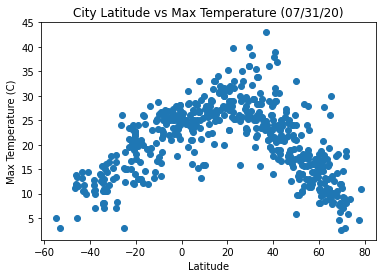

In [61]:
plt.scatter(lat, max_temp)
plt.title('City Latitude vs Max Temperature (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.show()

There is a strong correlation between Latitude and Max Temperature

## Latitude vs. Humidity Plot

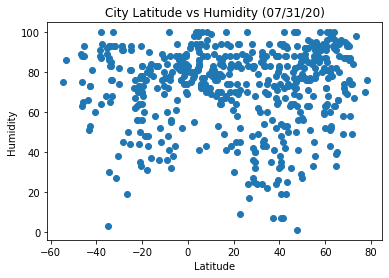

In [62]:
plt.scatter(lat, humidity)
plt.title('City Latitude vs Humidity (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

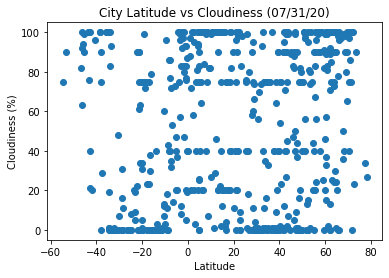

In [63]:
plt.scatter(lat, cloudiness)
plt.title('City Latitude vs Cloudiness (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

## Latitude vs. Wind Speed Plot

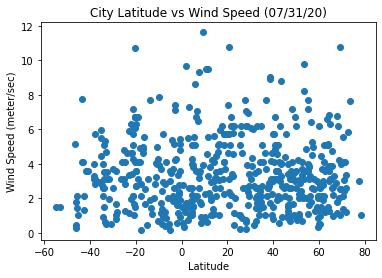

In [64]:
plt.scatter(lat, wind_speed)
plt.title('City Latitude vs Wind Speed (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (meter/sec)')
plt.show()

## Linear Regression

In [65]:
# OPTIONAL: Create a function to create Linear Regression plots

In [66]:
# Create Northern and Southern Hemisphere DataFrames
cities_df.head()
northern_cities_df = cities_df[cities_df['Lat'] >= 0]
southern_cities_df = cities_df[cities_df['Lat'] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is -0.67


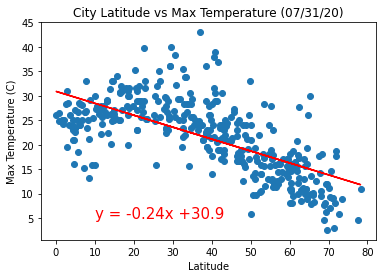

In [67]:
nt_lat_values = northern_cities_df['Lat']
nt_temp_values = northern_cities_df['Max Temp']
correlation = st.pearsonr(nt_lat_values, nt_temp_values)
print(f'The correlation between both factors is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(nt_lat_values, nt_temp_values)
regress_values = nt_lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(nt_lat_values, nt_temp_values)
plt.plot(nt_lat_values, regress_values, "r-")
plt.annotate(line_eq, (10,5), fontsize = 15, color = 'red')
plt.title('City Latitude vs Max Temperature (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between both factors is 0.79


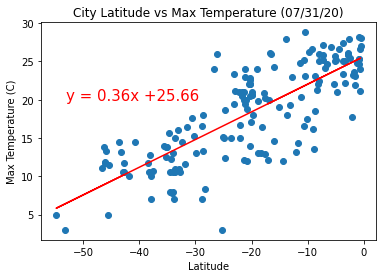

In [68]:
st_lat_values = southern_cities_df['Lat']
st_temp_values = southern_cities_df['Max Temp']
correlation = st.pearsonr(st_lat_values, st_temp_values)
print(f'The correlation between both factors is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(st_lat_values, st_temp_values)
regress_values = st_lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(st_lat_values, st_temp_values)
plt.plot(st_lat_values, regress_values, "r-")
plt.annotate(line_eq, (-53,20), fontsize = 15, color = 'red')
plt.title('City Latitude vs Max Temperature (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is -0.0


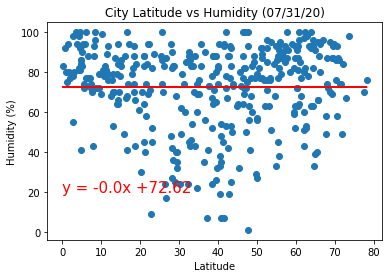

In [70]:
nt_lat_values = northern_cities_df['Lat']
nt_humd_values = northern_cities_df['Humidity']
correlation = st.pearsonr(nt_lat_values, nt_humd_values)
print(f'The correlation between both factors is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(nt_lat_values, nt_humd_values)
regress_values = nt_lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(nt_lat_values, nt_humd_values)
plt.plot(nt_lat_values, regress_values, "r-")
plt.annotate(line_eq, (0,20), fontsize = 15, color = 'red')
plt.title('City Latitude vs Humidity (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between both factors is -0.04


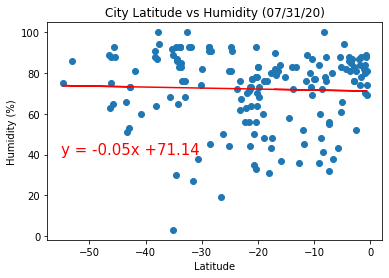

In [71]:
st_lat_values = southern_cities_df['Lat']
st_humd_values = southern_cities_df['Humidity']
correlation = st.pearsonr(st_lat_values, st_humd_values)
print(f'The correlation between both factors is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(st_lat_values, st_humd_values)
regress_values = st_lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(st_lat_values, st_humd_values)
plt.plot(st_lat_values, regress_values, "r-")
plt.annotate(line_eq, (-55,40), fontsize = 15, color = 'red')
plt.title('City Latitude vs Humidity (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is 0.04


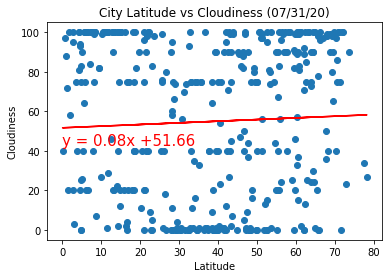

In [78]:
nt_lat_values = northern_cities_df['Lat']
nt_clou_values = northern_cities_df['Cloudiness']
correlation = st.pearsonr(nt_lat_values, nt_clou_values)
print(f'The correlation between both factors is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(nt_lat_values, nt_clou_values)
regress_values = nt_lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(nt_lat_values, nt_clou_values)
plt.plot(nt_lat_values, regress_values, "r-")
plt.annotate(line_eq, (0,43), fontsize = 15, color = 'red')
plt.title('City Latitude vs Cloudiness (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between both factors is -0.02


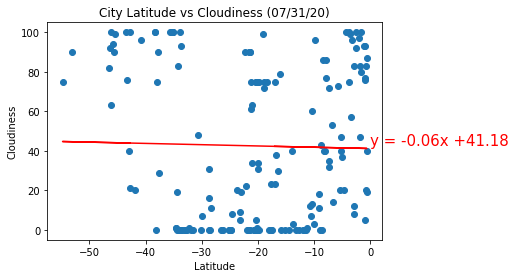

In [75]:
st_lat_values = southern_cities_df['Lat']
st_clou_values = southern_cities_df['Cloudiness']
correlation = st.pearsonr(st_lat_values, st_clou_values)
print(f'The correlation between both factors is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(st_lat_values, st_clou_values)
regress_values = st_lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(st_lat_values, st_clou_values)
plt.plot(st_lat_values, regress_values, "r-")
plt.annotate(line_eq, (0,43), fontsize = 15, color = 'red')
plt.title('City Latitude vs Cloudiness (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is -0.07


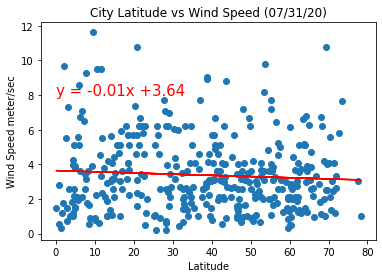

In [76]:
nt_lat_values = northern_cities_df['Lat']
nt_wind_values = northern_cities_df['Wind Speed']
correlation = st.pearsonr(nt_lat_values, nt_wind_values)
print(f'The correlation between both factors is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(nt_lat_values, nt_wind_values)
regress_values = nt_lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(nt_lat_values, nt_wind_values)
plt.plot(nt_lat_values, regress_values, "r-")
plt.annotate(line_eq, (0,8), fontsize = 15, color = 'red')
plt.title('City Latitude vs Wind Speed (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed meter/sec')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between both factors is 0.01


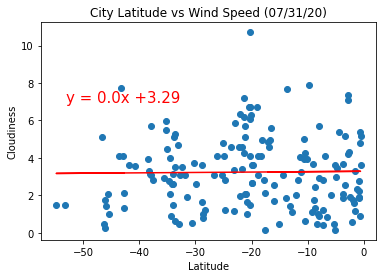

In [77]:
st_lat_values = southern_cities_df['Lat']
st_wind_values = southern_cities_df['Wind Speed']
correlation = st.pearsonr(st_lat_values, st_wind_values)
print(f'The correlation between both factors is {round(correlation[0],2)}')
(slope, intercept, rvalue, pvalue, stderr) = linregress(st_lat_values, st_wind_values)
regress_values = st_lat_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))
plt.scatter(st_lat_values, st_wind_values)
plt.plot(st_lat_values, regress_values, "r-")
plt.annotate(line_eq, (-53,7), fontsize = 15, color = 'red')
plt.title('City Latitude vs Wind Speed (07/31/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()